# Project 1: Batch LDLt factorization
Hakim CHEKIROU

# Execution

In [87]:
!nvcc -lineinfo -o cholesky cholesky.cu -gencode arch=compute_35,code=compute_35

nvcc warning : The 'compute_35', 'compute_37', 'compute_50', 'sm_35', 'sm_37' and 'sm_50' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [88]:
!  ./cholesky 

dimension 16 :
------------------------------------ 
Mono thread 
solution for system : 79 
[-0.638891, -0.132570, 0.373751, 0.880072, 1.386393, 1.892715, 2.399035, 2.905357, 3.411678, 3.917999, 4.424319, 4.930641, 5.436962, 5.943284, 6.449604, 6.955925, ]
GPU Timer: 62.560993 ms
------------------------------------ 
Row version 
solution for system : 79 
[-0.638891, -0.132570, 0.373751, 0.880072, 1.386393, 1.892715, 2.399035, 2.905357, 3.411678, 3.917999, 4.424319, 4.930641, 5.436962, 5.943284, 6.449604, 6.955925, ]
GPU Timer: 22.711231 ms
------------------------------------ 
Col version 
solution for system : 79 
[-0.638891, -0.132570, 0.373751, 0.880072, 1.386393, 1.892715, 2.399035, 2.905357, 3.411678, 3.917999, 4.424319, 4.930641, 5.436962, 5.943284, 6.449604, 6.955925, ]
GPU Timer: 22.389889 ms


# Affichage des temps d'execution

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [75]:
results = pd.read_csv("/content/results.txt", sep=";")
results.set_index(keys=["Dimension"], inplace=True)

Text(0, 0.5, 'ms')

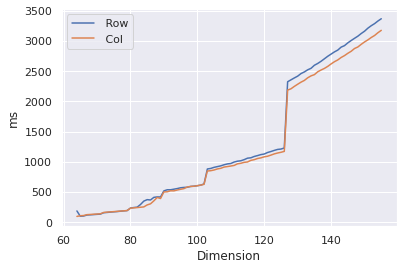

In [76]:

results.plot()
plt.ylabel("ms")


# GPU utilisé

In [2]:
from numba import cuda
gpu = cuda.get_current_device()
print("name = %s" % gpu.name)
print("maxThreadsPerBlock = %s" % str(gpu.MAX_THREADS_PER_BLOCK))
print("maxBlockDimX = %s" % str(gpu.MAX_BLOCK_DIM_X))
print("maxBlockDimY = %s" % str(gpu.MAX_BLOCK_DIM_Y))
print("maxBlockDimZ = %s" % str(gpu.MAX_BLOCK_DIM_Z))
print("maxGridDimX = %s" % str(gpu.MAX_GRID_DIM_X))
print("maxGridDimY = %s" % str(gpu.MAX_GRID_DIM_Y))
print("maxGridDimZ = %s" % str(gpu.MAX_GRID_DIM_Z))
print("maxSharedMemoryPerBlock = %s" % str(gpu.MAX_SHARED_MEMORY_PER_BLOCK))
print("asyncEngineCount = %s" % str(gpu.ASYNC_ENGINE_COUNT))
print("canMapHostMemory = %s" % str(gpu.CAN_MAP_HOST_MEMORY))
print("multiProcessorCount = %s" % str(gpu.MULTIPROCESSOR_COUNT))
print("warpSize = %s" % str(gpu.WARP_SIZE))
print("unifiedAddressing = %s" % str(gpu.UNIFIED_ADDRESSING))
print("pciBusID = %s" % str(gpu.PCI_BUS_ID))
print("pciDeviceID = %s" % str(gpu.PCI_DEVICE_ID))

name = b'Tesla T4'
maxThreadsPerBlock = 1024
maxBlockDimX = 1024
maxBlockDimY = 1024
maxBlockDimZ = 64
maxGridDimX = 2147483647
maxGridDimY = 65535
maxGridDimZ = 65535
maxSharedMemoryPerBlock = 49152
asyncEngineCount = 3
canMapHostMemory = 1
multiProcessorCount = 40
warpSize = 32
unifiedAddressing = 1
pciBusID = 0
pciDeviceID = 4


## Verification pour un exemple 

In [ ]:

import numpy as np
X = np.array([-0.123493, 0.382828, 0.889149, 1.395470, 1.901791, 2.408113, 2.914433, ])
rho = 1.0/(1.1+79)
A = np.zeros((7,7)) # matrice numero 79 affichée
for i in range(7):
  for j in range(7):
    if (i==j):
      A[i][j] = 1.0
    else:
      A[i][j] = rho
A@X

array([-6.61672909e-08,  4.99999823e-01,  9.99999712e-01,  1.49999960e+00,
        1.99999949e+00,  2.50000037e+00,  2.99999927e+00])